In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch import optim

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [14]:
# 定义数据
x = torch.rand([50, 1])
y = x * 3 + 0.8

x, y = x.to(device), y.to(device)

In [15]:
# 创建模型
class Lr(nn.Module):
    def __init__(self):
        super(Lr, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        out = self.linear(x)
        return out


# 实例化模型 Loss 优化器
model = Lr().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

for i in range(30000):
    out = model(x)  # 获取预测值
    loss = criterion(y, out)  # 计算损失

    optimizer.zero_grad()  # 梯度归零

    loss.backward()  # 计算梯度

    optimizer.step()  # 更新梯度

    if i % 200 == 0:
        print('Epoch: {}/{} , Loss: {}'.format(i, 30000, loss.data))

Epoch: 0/30000 , Loss: 3.669598340988159
Epoch: 200/30000 , Loss: 1.9122081995010376
Epoch: 400/30000 , Loss: 1.1832029819488525
Epoch: 600/30000 , Loss: 0.8661371469497681
Epoch: 800/30000 , Loss: 0.7150841355323792
Epoch: 1000/30000 , Loss: 0.631756067276001
Epoch: 1200/30000 , Loss: 0.5768254399299622
Epoch: 1400/30000 , Loss: 0.5345957279205322
Epoch: 1600/30000 , Loss: 0.4988305866718292
Epoch: 1800/30000 , Loss: 0.46669161319732666
Epoch: 2000/30000 , Loss: 0.43717268109321594
Epoch: 2200/30000 , Loss: 0.4096979796886444
Epoch: 2400/30000 , Loss: 0.3840175271034241
Epoch: 2600/30000 , Loss: 0.36007994413375854
Epoch: 2800/30000 , Loss: 0.3376767933368683
Epoch: 3000/30000 , Loss: 0.3163205087184906
Epoch: 3200/30000 , Loss: 0.29655754566192627
Epoch: 3400/30000 , Loss: 0.27803555130958557
Epoch: 3600/30000 , Loss: 0.2607000172138214
Epoch: 3800/30000 , Loss: 0.24449573457241058
Epoch: 4000/30000 , Loss: 0.22912049293518066
Epoch: 4200/30000 , Loss: 0.2150203287601471
Epoch: 4400/

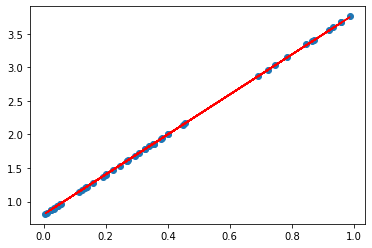

In [16]:
model.eval()
prediction = model(x)
prediction = prediction.cpu().detach().numpy()
# prediction = prediction.data.numpy()
plt.scatter(x.cpu().data.numpy(), y.cpu().data.numpy())
plt.plot(x.cpu().data.numpy(), prediction, c='r')
plt.show()